In [637]:
# importing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder

In [638]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [639]:
# Deep Learning libraries
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, precision_recall_fscore_support
import os

In [640]:
train = pd.read_csv('dataset/train.csv')

In [641]:
Q1 = np.percentile(train['Fare'],25)
Q3 = np.percentile(train['Fare'],75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
train = train[(train['Fare'] > lower) & (train['Fare'] < upper)].reset_index(drop=True)
print(train.shape)

(775, 12)


In [642]:
train_age_median = train['Age'].median()
train['Age'] = train['Age'].fillna(train_age_median)

In [643]:
train = train.drop('Cabin', axis=1)

In [644]:
train = train.dropna()

In [645]:
train['Fare'] = np.log(train['Fare'] + 1)

In [646]:
age_group = pd.cut(train['Age'], bins=[0, 20, 40, 60, 80], labels=['young', 'lower_mid_age', 'upper_mid_age', 'old'])
train['Age_group'] = age_group
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,lower_mid_age
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,lower_mid_age
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,lower_mid_age
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,lower_mid_age
4,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,2.246893,Q,lower_mid_age


In [647]:
train['Family_size'] = train['SibSp'] + train['Parch']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,lower_mid_age,1
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,lower_mid_age,0
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,lower_mid_age,1
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,lower_mid_age,0
4,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,2.246893,Q,lower_mid_age,0


In [648]:
train['Is_alone'] = 0
train.loc[train['Family_size'] >= 1, 'Is_alone'] = 1
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Family_size,Is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,lower_mid_age,1,1
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,lower_mid_age,0,0
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,lower_mid_age,1,1
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,lower_mid_age,0,0
4,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,2.246893,Q,lower_mid_age,0,0


In [649]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_group,Family_size,Is_alone
0,0,3,male,22.0,2.110213,S,lower_mid_age,1,1
1,1,3,female,26.0,2.188856,S,lower_mid_age,0,0
2,1,1,female,35.0,3.990834,S,lower_mid_age,1,1
3,0,3,male,35.0,2.202765,S,lower_mid_age,0,0
4,0,3,male,28.0,2.246893,Q,lower_mid_age,0,0


In [650]:
train_age_dummies = pd.get_dummies(train['Sex'])
train = pd.concat([train, train_age_dummies], axis=1)

In [651]:
train_embarked_dummies = pd.get_dummies(train['Embarked'])
train = pd.concat([train, train_embarked_dummies], axis=1)

In [652]:
train_age_dummies = pd.get_dummies(train['Age_group'])
train = pd.concat([train, train_age_dummies], axis=1)

In [653]:
train = train.drop(['Sex', 'Embarked', 'Age', 'Age_group'], axis=1)

In [654]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [655]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [656]:
X_train.head()

,Pclass,Fare,Family_size,Is_alone,female,male,C,Q,S,young,lower_mid_age,upper_mid_age,old
765,3,2.185579,0,0,0,1,0,0,1,0,1,0,0
419,3,2.202765,0,0,0,1,0,0,1,0,0,1,0
118,3,2.085672,0,0,0,1,0,0,1,1,0,0,0
252,3,2.202765,0,0,0,1,0,0,1,1,0,0,0
157,3,2.188856,0,0,0,1,0,0,1,0,1,0,0


In [657]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

In [658]:
lr.score(X_test, y_test)

0.7741935483870968

In [687]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape=(13,), activation='relu'))
#model.add(keras.layers.Dense(10, activation='relu'))
#model.add(Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [694]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=10)

Epoch 1/50
50/50 [==============================] - 1s 5ms/step - loss: 0.4137 - accuracy: 0.8165 - val_loss: 0.3912 - val_accuracy: 0.8306
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8266 - val_loss: 0.3876 - val_accuracy: 0.8306
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8105 - val_loss: 0.3839 - val_accuracy: 0.8387
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8165 - val_loss: 0.3853 - val_accuracy: 0.8468
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8145 - val_loss: 0.3927 - val_accuracy: 0.8468
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8105 - val_loss: 0.3941 - val_accuracy: 0.8306
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.8125 - val_loss: 0.3942 - val_accuracy: 0.8468
Epoch 8/50
50/50 [==

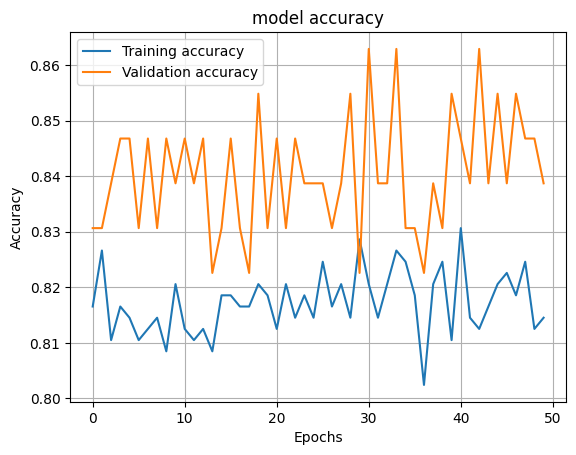

In [695]:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

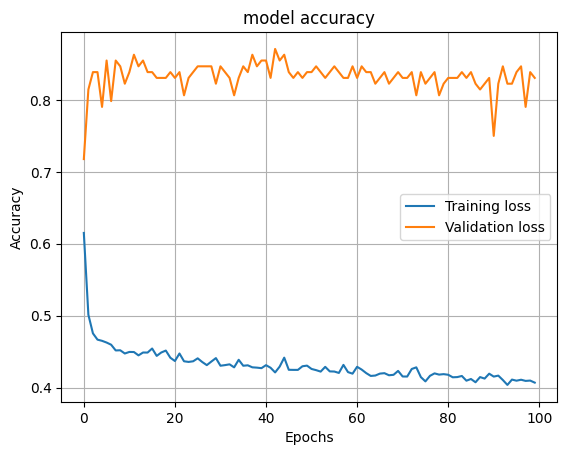

In [690]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_accuracy'], label="Validation loss")
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

In [691]:
ann_predictions = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [692]:
test_loss, test_acc = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.7548


In [693]:
print(f'Model ACCURACY is {test_acc}')
print(f'Model LOSS is {test_loss}')

Model ACCURACY is 0.7548387050628662
Model LOSS is 0.541851818561554
